In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
from nltk.stem import PorterStemmer
import matplotlib.ticker as mtick
from urllib.parse import urlparse
import seaborn as sns

In [42]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [43]:
df_original = pd.read_csv('Entrenamieto_ECI_2020.csv')
df = df_original

In [44]:
df.head()

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,6/16/2015,...,Q2,2016,NaT,10,EUR,5272800.00,EUR,5272800.00,Closed Lost,Prod_Category_A_None
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,6/16/2015,...,Q1,2016,NaT,0,EUR,48230.00,EUR,48230.00,Closed Won,Prod_Category_A_None
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,4/21/2015,...,Q1,2016,NaT,0,USD,83865.60,USD,83865.60,Closed Won,Prod_Category_A_None
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,Q1,2018,NaT,14,USD,7421881.50,USD,7421881.50,Closed Lost,Prod_Category_A_None
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,Q1,2018,NaT,25,USD,13357192.50,USD,13357192.50,Closed Lost,Prod_Category_A_None


# Convierto los tipos de datos de las columnas

In [10]:
df.dtypes

ID                                      int64
Region                                 object
Territory                              object
Pricing, Delivery_Terms_Quote_Appr      int64
Pricing, Delivery_Terms_Approved        int64
Bureaucratic_Code_0_Approval            int64
Bureaucratic_Code_0_Approved            int64
Submitted_for_Approval                  int64
Bureaucratic_Code                      object
Account_Created_Date                   object
Source                                 object
Billing_Country                        object
Account_Name                           object
Opportunity_Name                       object
Opportunity_ID                          int64
Sales_Contract_No                      object
Account_Owner                          object
Opportunity_Owner                      object
Account_Type                           object
Opportunity_Type                       object
Quote_Type                             object
Delivery_Terms                    

In [14]:
new_cols_types = {
    "Region" : "category",
    "Territory" : "category",
    "Pricing, Delivery_Terms_Quote_Appr" : "bool",
    "Pricing, Delivery_Terms_Approved" : "bool",
    "Bureaucratic_Code_0_Approval" : "bool",
    "Bureaucratic_Code_0_Approved" : "bool",
    "Submitted_for_Approval" : "bool",
    "Bureaucratic_Code" : "category",
    "Account_Created_Date" : "datetime64",
    "Source" : "category",
    "Billing_Country" : "category",
    "Account_Name" : "category",
    "Opportunity_Name" : "category",
    "Sales_Contract_No" : "int64",
    "Account_Owner" : "category",
    "Opportunity_Owner" : "category",
    "Account_Type" : "category",
    "Opportunity_Type" : "category",
    "Quote_Type" : "category",
    "Delivery_Terms" : "category",
    "Opportunity_Created_Date" : "datetime64",
    "Brand" : "category",
    "Product_Type" : "category",
    "Size" : "category",
    "Product_Category_B" : "category",
    "Price" : "float64",
    "Currency" : "category",
    "Last_Activity" : "dametime64",
    "Quote_Expiry_Date" : "dametime64",
    "Last_Modified_Date" : "dametime64",
    "Last_Modified_By" : "category",
    "Product_Family" : "category",
    "Product_Name" : "category",
    "ASP_Currency" : "category",
    "ASP_(converted)_Currency" : "category",
    "Planned_Delivery_Start_Date" : "datetime64",
    "Planned_Delivery_End_Date" : "datetime64",
    "Delivery_Quarter" : "category",
    "Delivery_Year" : "datetime64",
    "Actual_Delivery_Date" : "datetime64",
    "Total_Amount_Currency" : "float64",
    "Total_Taxable_Amount_Currency" : "category",
    "Total_Taxable_Amount" : "float64",
    "Stages" : "category",
    "Prod_Category_A" : "category"
}

cols = {
    "Brand" : "category",
    "Product_Type" : "category",
    "Size" : "category",
    "Product_Category_B" : "category",
    "Price" : "float64",
    "Currency" : "category",
    "Last_Activity" : "dametime64",
    "Quote_Expiry_Date" : "dametime64",
    "Last_Modified_Date" : "dametime64",
    "Last_Modified_By" : "category",
    "Product_Family" : "category",
    "Product_Name" : "category",
    "ASP_Currency" : "category",
    "ASP_(converted)_Currency" : "category",
    "Planned_Delivery_Start_Date" : "datetime64",
    "Planned_Delivery_End_Date" : "datetime64",
    "Delivery_Quarter" : "category",
    "Delivery_Year" : "datetime64",
    "Actual_Delivery_Date" : "datetime64",
    "Total_Amount_Currency" : "float64",
    "Total_Taxable_Amount_Currency" : "category",
    "Total_Taxable_Amount" : "float64",
    "Stages" : "category",
    "Prod_Category_A" : "category"
}

df = df.astype(cols, errors="ignore")

df.dtypes()

TypeError: data type "dametime64" not understood

In [ ]:
df["Month"].value_counts()

In [ ]:
df["Actual_Delivery_Date"].value_counts()

# Relacion entre Opportunity_Owner y Stages

In [85]:
df_opportunity = df[["Opportunity_Owner", "Account_Owner", "Stage", "Opportunity_Name"]].groupby("Opportunity_Name").agg(pd.Series.nunique)
df_opportunity[(df_opportunity["Opportunity_Owner"] != 1) | (df_opportunity["Stage"] != 1) | df_opportunity["Account_Owner"] != 1]

,Opportunity_Owner,Account_Owner,Stage
Opportunity_Name,,,


Esto significa que cada entrada del df es un item de una oportunidad, y todo los items tienen el mismo desenlace (valor Stage) y las oportunidades son manejadas por un único Opportunity_Owner y Account_Owner.

In [151]:
df_owners = df[["Opportunity_Owner", "Stage", "Opportunity_Name"]].drop_duplicates()
df_owners = df_owners[["Stage", "Opportunity_Owner"]]
df_owners.head()

,Stage,Opportunity_Owner
0,Closed Lost,Person_Name_18
1,Closed Won,Person_Name_20
2,Closed Won,Person_Name_8
3,Closed Lost,Person_Name_8
4,Closed Lost,Person_Name_8


In [152]:
df_owners = df_owners.astype({"Opportunity_Owner" : "category", "Stage" : "category"})
df_owners.dtypes

Stage                category
Opportunity_Owner    category
dtype: object

In [95]:
df_owners.describe()

,Stage,Opportunity_Owner
count,9841,9841
unique,5,53
top,Closed Won,Person_Name_50
freq,5072,958


In [153]:
df_owners = df_owners[(df_owners["Stage"] == "Closed Won") | (df_owners["Stage"] == "Closed Lost")]
df_owners.describe()

,Stage,Opportunity_Owner
count,9791,9791
unique,2,53
top,Closed Won,Person_Name_50
freq,5072,951


In [150]:
def mean_closed_wons(x):
    return (x == "Closed Won").mean()

In [154]:
df_owners

,Stage,Opportunity_Owner
0,Closed Lost,Person_Name_18
1,Closed Won,Person_Name_20
2,Closed Won,Person_Name_8
3,Closed Lost,Person_Name_8
4,Closed Lost,Person_Name_8
...,...,...
16939,Closed Won,Person_Name_13
16940,Closed Lost,Person_Name_13
16942,Closed Won,Person_Name_13
16945,Closed Lost,Person_Name_3


In [198]:
df_owners_mean_wins = df_owners.groupby("Opportunity_Owner").filter(lambda x: x["Stage"].count() > 50)

df_owners_mean_wins["Stage"] = df_owners_mean_wins["Stage"].apply(lambda x: 1 if (x == "Closed Won") else 0)

df_owners_mean_wins

,Stage,Opportunity_Owner
0,0,Person_Name_18
2,1,Person_Name_8
3,0,Person_Name_8
4,0,Person_Name_8
5,0,Person_Name_8
...,...,...
16939,1,Person_Name_13
16940,0,Person_Name_13
16942,1,Person_Name_13
16945,0,Person_Name_3


In [199]:
df_owners_mean_wins = df_owners_mean_wins.groupby("Opportunity_Owner").agg({"Stage" : "mean"}).dropna()["Stage"].nlargest(15).to_frame().rename(columns = {"Stage": "Percentage Closed Wons"})
df_owners_mean_wins

,Percentage Closed Wons
Opportunity_Owner,
Person_Name_19,0.97
Person_Name_52,0.78
Person_Name_32,0.77
Person_Name_64,0.68
Person_Name_65,0.68
Person_Name_66,0.66
Person_Name_55,0.65
Person_Name_50,0.63
Person_Name_33,0.60


Grafico el resultado

Text(0, 0.5, 'Opportunity Owner')

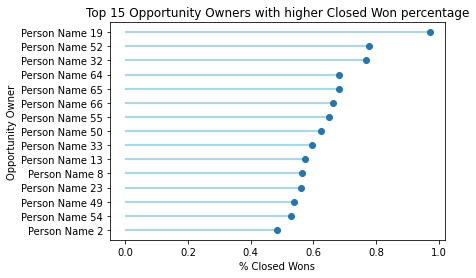

In [202]:
df_owners_mean_wins = df_owners_mean_wins.sort_values("Percentage Closed Wons", ascending = True)
df_owners_mean_wins.index = df_owners_mean_wins.index.str.replace("_", " ", regex = True)

plt.hlines(y = df_owners_mean_wins.index, xmin = 0, xmax = df_owners_mean_wins['Percentage Closed Wons'], color='skyblue')
plt.plot(df_owners_mean_wins['Percentage Closed Wons'], df_owners_mean_wins.index, "o")
 
# Add titles and axis names
plt.yticks(rotation = 0)
plt.title("Top 15 Opportunity Owners with higher Closed Won percentage", loc='center')
plt.xlabel('% Closed Wons')
plt.ylabel('Opportunity Owner')


### Verificacion Total_Taxable_Ammount

In [65]:
df_taxable = df[["Opportunity_Name", "Total_Amount", "Total_Taxable_Amount"]]

In [66]:
df_grouped = df_taxable.groupby("Opportunity_Name").agg({"Total_Amount" : "sum", "Total_Taxable_Amount" : "mean"})

df_grouped["Difference"] = df_grouped["Total_Amount"] - df_grouped["Total_Taxable_Amount"]
df_grouped

,Total_Amount,Total_Taxable_Amount,Difference
Opportunity_Name,,,
Opportunity_Name_0,3494400.00,3494400.00,0.00
Opportunity_Name_1,2193100.00,2193100.00,0.00
Opportunity_Name_100,543780.00,543780.00,0.00
Opportunity_Name_1000,142142000.00,142142000.00,0.00
Opportunity_Name_10000,19600.00,0.00,19600.00
...,...,...,...
Opportunity_Name_9992,175190.40,0.00,175190.40
Opportunity_Name_9995,1043490.00,1043490.00,0.00
Opportunity_Name_9996,790246.88,790246.88,0.00


In [70]:
df_true = df_grouped[(df_grouped["Difference"] != 0) & (df_grouped["Total_Taxable_Amount"] != 0)]
df_true

,Total_Amount,Total_Taxable_Amount,Difference
Opportunity_Name,,,
Opportunity_Name_10374,61755.05,61755.05,0.00
Opportunity_Name_10398,14120268.80,14120268.80,-0.00
Opportunity_Name_10429,167706.00,118671.10,49034.90
Opportunity_Name_10434,3440056.90,3440056.90,0.00
Opportunity_Name_10437,2273949.30,2273949.30,-0.00
...,...,...,...
Opportunity_Name_9735,1065049.70,1065049.70,0.00
Opportunity_Name_9806,972370.35,972370.35,0.00
Opportunity_Name_9843,964092.15,964092.15,-0.00


Estos son los que no tienen sentido

In [69]:
df_true = df_true[round(df_true["Difference"])  < 0]
df_true

,Total_Amount,Total_Taxable_Amount,Difference
Opportunity_Name,,,
Opportunity_Name_11024,51408.00,51512.40,-104.40
Opportunity_Name_11864,43972.50,4891061.00,-4847088.50
Opportunity_Name_12137,317625.00,420750.00,-103125.00
Opportunity_Name_12362,71456.25,86418.75,-14962.50
Opportunity_Name_1308,11111133.92,28944810.10,-17833676.18
Opportunity_Name_2214,539956.80,60059395.00,-59519438.20
Opportunity_Name_2215,539956.80,60059395.00,-59519438.20
Opportunity_Name_224,12432.00,14061.76,-1629.76
Opportunity_Name_2802,310050.00,620100.00,-310050.00
